<a href="https://colab.research.google.com/github/avfka/itmo-ml-labs-2025/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Инструменты для анализа и предобработки данных

Цель данной лабораторной работы - вспомнить инструментарий pandas, SQL и matplotlib для проведения анализа и предобработки данных.

С точки зрения машинного обучения в данной работе будет рассмотрен алгоритм kNN, алгоритм кластеризации kMeans, а также некоторые методы снижения размерности.

Датасет, с которым вам предстоит работать, содержит информацию о покупателях в одном из магазинов. Данные разделены на несколько файлов.
<br><br>
**people**

`id`: уникальный идентификатор клиента

`year_birth`: год рождения клиента

`education`: уровень образования клиента

`marital_status`: семейное положение клиента

`income`: годовой доход семьи клиента

`kidhome`: количество детей в доме клиента

`teenhome`: количество подростков в доме клиента

`dt_customer`: дата регистрации клиента в компании

`recency`: количество дней с момента последней покупки клиента

`complain`: 1, если клиент жаловался в последние 2 года, 0 в противном случае
<br><br>
**products**

`id`: уникальный идентификатор клиента

`mntwines`: сумма, потраченная на вино за последние 2 года

`mntfruits`: сумма, потраченная на фрукты за последние 2 года

`mntmeatproducts`: сумма, потраченная на мясные продукты за последние 2 года

`mntfishproducts`: сумма, потраченная на рыбу за последние 2 года

`mntsweetproducts`: сумма, потраченная на сладости за последние 2 года

`mntgoldprods`: сумма, потраченная на золото за последние 2 года
<br><br>
**purchases**

`id`: уникальный идентификатор клиента

`numwebpurchases`: количество покупок через веб-сайт компании

`numcatalogpurchases`: количество покупок с использованием каталога

`numstorepurchases`: количество покупок непосредственно в магазинах

`numwebvisitsmonth`: количество посещений веб-сайта компании в последний месяц

`numdealspurchases`: количество покупок скидочных товаров

In [ ]:
!gdown 1LUjAJR6hNs5IAnQscisvM2hUemvYRLWy
!unzip customers.zip

Downloading...
From: https://drive.google.com/uc?id=1LUjAJR6hNs5IAnQscisvM2hUemvYRLWy
To: /content/customers.zip
100% 66.6k/66.6k [00:00<00:00, 877kB/s]
Archive:  customers.zip
replace products.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: products.csv            
replace people.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: people.csv              
replace purchases.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: purchases.csv           


## pandas, sql

In [ ]:
import pandas as pd

Прочитайте данные. Сколько строк и столбцов содержат таблицы? Есть ли в данных пропуски?

In [ ]:
people = pd.read_csv('people.csv', sep = ';')
products = pd.read_csv('products.csv', sep = '\t')
purchases = pd.read_csv('purchases.csv', sep = ',')

def print_info(df, name):
    print(f"Таблица {name}:")
    print(f"Количество строк: {df.shape[0]}")
    print(f"Количество столбцов: {df.shape[1]}")
    print(f"Пропуски в данных: {df.isnull().sum().sum()}")
    print("\n")

print_info(people, 'people')
print_info(products, 'products')
print_info(purchases, 'purchases')

Таблица people:
Количество строк: 2240
Количество столбцов: 10
Пропуски в данных: 24


Таблица products:
Количество строк: 2240
Количество столбцов: 7
Пропуски в данных: 0


Таблица purchases:
Количество строк: 2240
Количество столбцов: 6
Пропуски в данных: 0




In [ ]:
# Очистка данных перед анализом
'''def clean_data(df):
    df = df.drop_duplicates()
    df = df.fillna({
        'income': df['income'].median(),
        'education': 'Unknown',
        'mntsweetproducts': 0
    })
    df = df.dropna(subset=['id', 'year_birth'])
    return df

people = clean_data(people)'''

"def clean_data(df):\n    df = df.drop_duplicates()\n    df = df.fillna({\n        'income': df['income'].median(),\n        'education': 'Unknown',\n        'mntsweetproducts': 0\n    })\n    df = df.dropna(subset=['id', 'year_birth'])\n    return df\n\npeople = clean_data(people)"

Каждое из следующих заданий необходимо выполнить двумя способами - с помощью pandas и с помощью SQL. Не используйте объединение таблиц через join/merge/concat.

In [ ]:
import sqlite3

conn = sqlite3.connect(':memory:')  # создание временной базы данных

people.to_sql('people', conn, index=False)
products.to_sql('products', conn, index=False)
purchases.to_sql('purchases', conn, index=False)

query = "SELECT * FROM people LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [ ]:
query = "SELECT * FROM products LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,id,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


In [ ]:
query = "SELECT * FROM purchases LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,id,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth
0,5524,3,8,10,4,7
1,2174,2,1,1,2,5
2,4141,1,8,2,10,4
3,6182,2,2,0,4,6
4,5324,5,5,3,6,5


### 1

Найдите абсолютную разницу между минимальным доходом клиентов с детьми и максимальным доходом клиентов без детей. Учитывайте только столбец `kidhome`.

Код на pandas:

In [ ]:
# Клиенты с детьми
with_kids = people[people['kidhome'] > 0]
min_income_with_kids = with_kids['income'].min()

# Клиенты без детей
without_kids = people[people['kidhome'] == 0]
max_income_without_kids = without_kids['income'].max()

# Абсолютная разница
absolute_diff = abs(min_income_with_kids - max_income_without_kids)

print(f"Минимальный доход клиентов с детьми: {min_income_with_kids}")
print(f"Максимальный доход клиентов без детей: {max_income_without_kids}")
print(f"Абсолютная разница: {absolute_diff}")

Минимальный доход клиентов с детьми: 2447.0
Максимальный доход клиентов без детей: 160803.0
Абсолютная разница: 158356.0


In [ ]:
query1 = 'SELECT MIN(income) FROM people WHERE kidhome > 0'
result1 = pd.read_sql_query(query1, conn)
print('Минимальный доход клиентов с детьми: ')
print(result1.iloc[0, 0])

query2 = 'SELECT MAX(income) FROM people WHERE kidhome = 0'
result2 = pd.read_sql_query(query2, conn)
print('Максимальный доход клиентов без детей: ')
print(result2.iloc[0, 0])

query3 = """
SELECT ABS(
    (SELECT MIN(income) FROM people WHERE kidhome > 0) -
    (SELECT MAX(income) FROM people WHERE kidhome = 0)
) AS absolute_income_difference;
"""
result3 = pd.read_sql_query(query3, conn)
print('Абсолютная разница: ')
print(result3.iloc[0, 0])


Минимальный доход клиентов с детьми: 
2447.0
Максимальный доход клиентов без детей: 
160803.0
Абсолютная разница: 
158356.0


### 2
Посчитайте процентное соотношение клиентов, имеющих PhD или другой уровень образования, среди клиентов, покупающих и не покупающих сладкое. Ответ представьте в виде:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        th, td {
            text-align: center;
            padding: 10px;
        }
        th {
            font-weight: bold;
        }
    </style>
</head>
<body>

<table border="1">
  <tr>
    <th></th>
    <th>PhD</th>
    <th>Other</th>
  </tr>
  <tr>
    <th>Sweets</th>
    <td>percentage</td>
    <td>percentage</td>
  </tr>
  <tr>
    <th>No Sweets</th>
    <td>percentage</td>
    <td>percentage</td>
  </tr>
</table>

</body>
</html>

Сумма по строке должна давать единицу.

In [ ]:
def calculate_education_percentages(people, products):
    # Общее
    common_ids = people.index.intersection(products.index)
    people_common = people.loc[common_ids]
    products_common = products.loc[common_ids]

    # Образование
    phd_count = (people_common['education'] == 'PhD').sum()
    other_count = len(people_common) - phd_count

    # Покупатели и не покупатели сладкого
    sweet_buyers = products_common['mntsweetproducts'] > 0
    sweet_count = sweet_buyers.sum()
    no_sweet_count = len(products_common) - sweet_count

    sweet_phd = (people_common.loc[sweet_buyers, 'education'] == 'PhD').sum()
    sweet_other = sweet_count - sweet_phd

    no_sweet_phd = (people_common.loc[~sweet_buyers, 'education'] == 'PhD').sum()
    no_sweet_other = no_sweet_count - no_sweet_phd

    # Проценты
    sweet_phd_pct = (sweet_phd / sweet_count) * 100 if sweet_count > 0 else 0
    sweet_other_pct = (sweet_other / sweet_count) * 100 if sweet_count > 0 else 0

    no_sweet_phd_pct = (no_sweet_phd / no_sweet_count) * 100 if no_sweet_count > 0 else 0
    no_sweet_other_pct = (no_sweet_other / no_sweet_count) * 100 if no_sweet_count > 0 else 0

    result = pd.DataFrame({
        'PhD': [sweet_phd_pct, no_sweet_phd_pct],
        'Other': [sweet_other_pct, no_sweet_other_pct]
    }, index=['Sweets', 'No Sweets'])

    return result.round(1)

result = calculate_education_percentages(people, products)
result

,PhD,Other
Sweets,18.3,81.7
No Sweets,36.5,63.5


In [ ]:
query = """
WITH
sweet_categories AS (
    SELECT
        id,
        CASE WHEN mntsweetproducts > 0 THEN 'Sweets' ELSE 'No Sweets' END AS category
    FROM products
),
education_stats AS (
    SELECT
        id,
        CASE WHEN education = 'PhD' THEN 1 ELSE 0 END AS is_phd,
        CASE WHEN education != 'PhD' THEN 1 ELSE 0 END AS is_other
    FROM people
),
combined_data AS (
    SELECT
        sc.category,
        SUM(es.is_phd) AS phd_count,
        SUM(es.is_other) AS other_count,
        COUNT(*) AS total
    FROM sweet_categories sc, education_stats es
    WHERE sc.id = es.id  -- Фильтрация вместо JOIN
    GROUP BY sc.category
)
SELECT
    category AS " ",
    ROUND(100.0 * phd_count / total, 1) AS "PhD",
    ROUND(100.0 * other_count / total, 1) AS "Other"
FROM combined_data
ORDER BY CASE WHEN category = 'Sweets' THEN 1 ELSE 2 END;
"""

result = pd.read_sql_query(query, conn)
result.set_index(' ', inplace=True)

result


,PhD,Other
,,
Sweets,18.3,81.7
No Sweets,36.5,63.5


## EDA

Изучите графики, которые предлагает построить Google Colab. Какие из них несут смысл, а какие выглядят бесполезными? На основании изученных графиков сформулируйте любую гипотезу по данным и постройте график, который поможет подтвердить или опровергнуть вашу гипотезу. Ваш график должен отличаться от уже представленных!

**people**

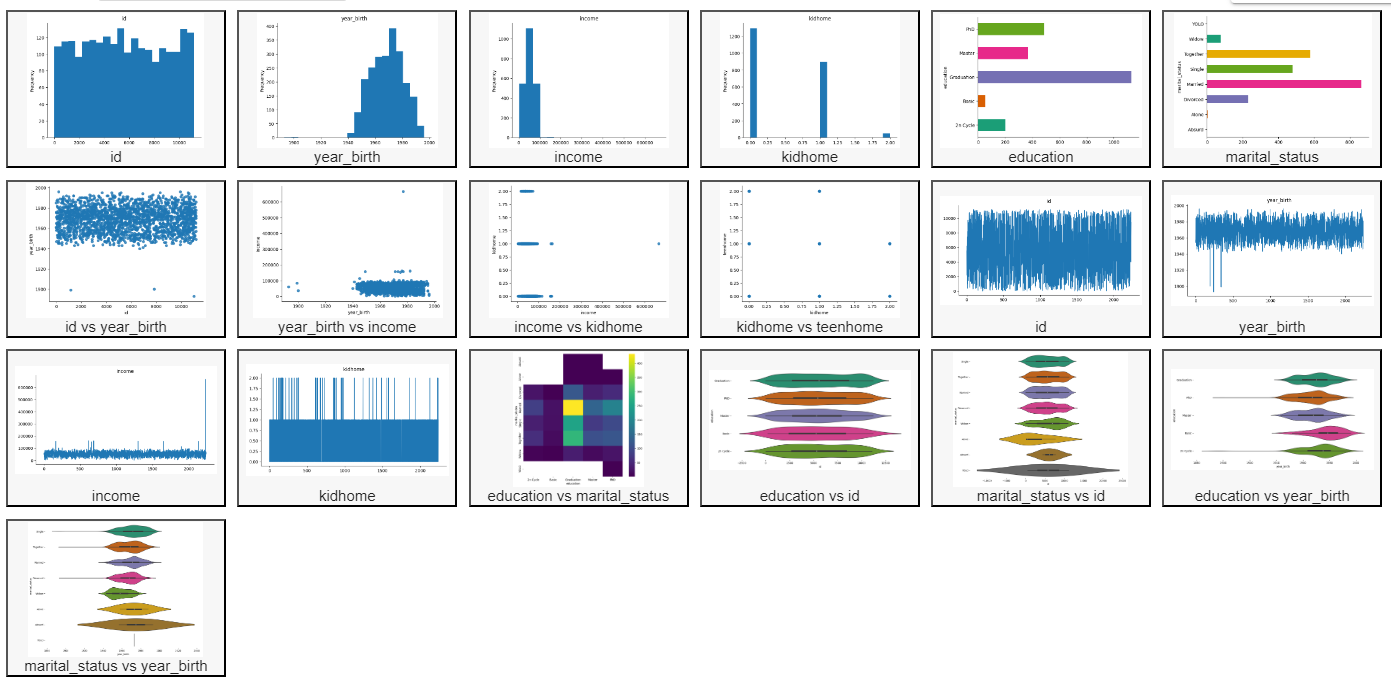

**products**

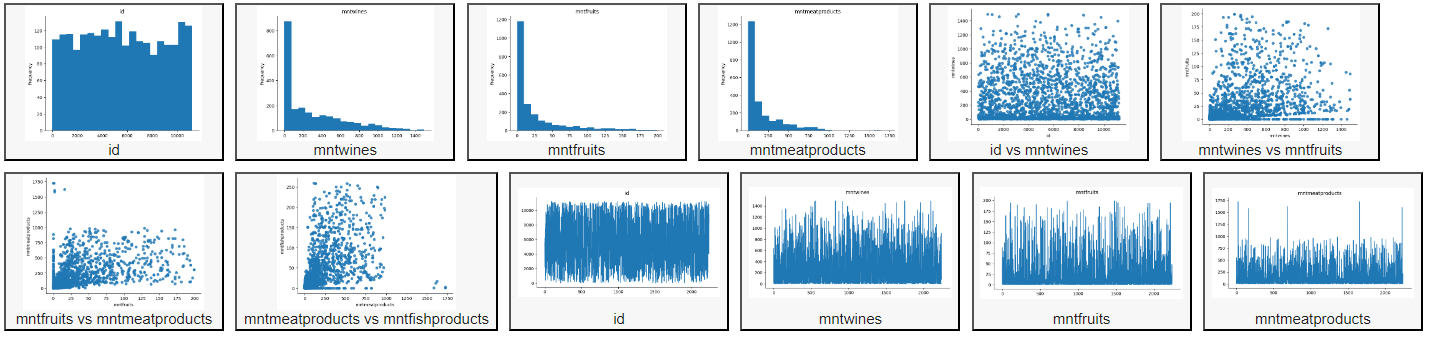

**purchases**

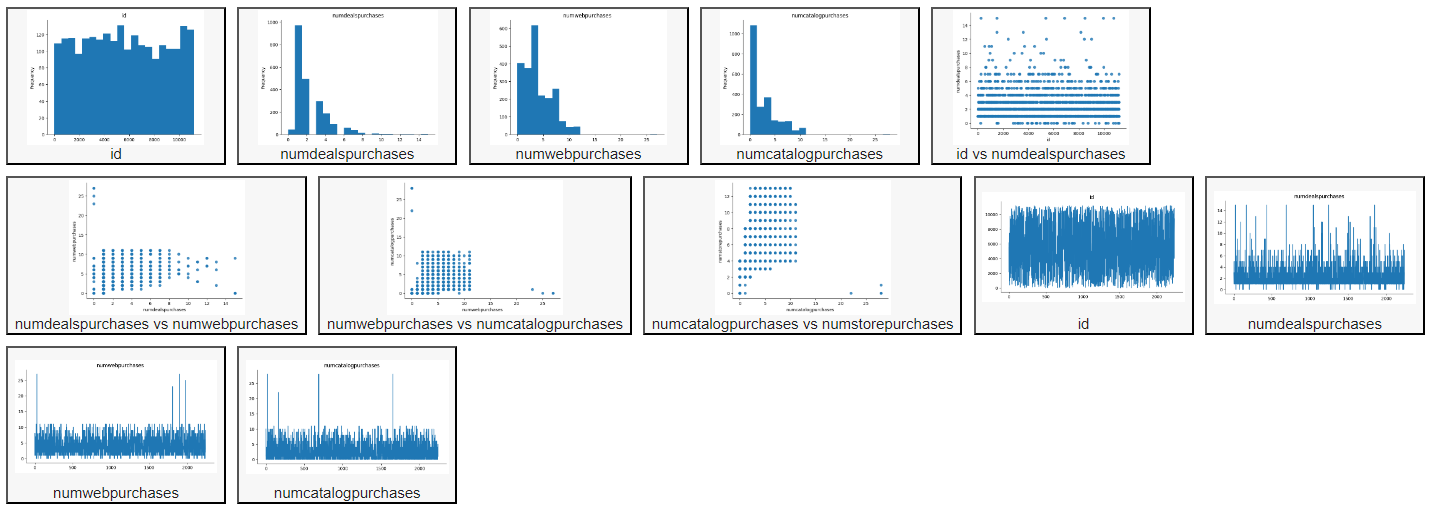

In [ ]:
people

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0


In [ ]:
products

,id,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15
...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247
2236,4001,406,0,30,0,0,8
2237,7270,908,48,217,32,12,24
2238,8235,428,30,214,80,30,61


In [ ]:
purchases

,id,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth
0,5524,3,8,10,4,7
1,2174,2,1,1,2,5
2,4141,1,8,2,10,4
3,6182,2,2,0,4,6
4,5324,5,5,3,6,5
...,...,...,...,...,...,...
2235,10870,2,9,3,4,5
2236,4001,7,8,2,5,7
2237,7270,1,2,3,13,6
2238,8235,2,6,5,10,3


**Полезные графики:**

Распределение возраста клиентов (из people) - показывает целевую аудиторию

Суммы покупок по категориям (из products) - выявляет популярные товарные группы

Количество покупок по каналам (из purchases) - показывает предпочтительные способы покупок

**Менее полезные:**

Коробчатые диаграммы без контекста (например, абсолютные значения без нормализации)

Простые гистограммы с равномерным распределением, не несущие аналитической ценности


**Гипотеза:** Клиенты без детей больше денег тратят на вино

Средние расходы на вино:
Семьи с детьми: 80.93
Семьи с подростками: 415.98
Семьи без детей: 487.31
Смешанные семьи: 129.66


<ipython-input-77-ea6cfad2f96e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Wine', data=wine_data, palette="Set2")


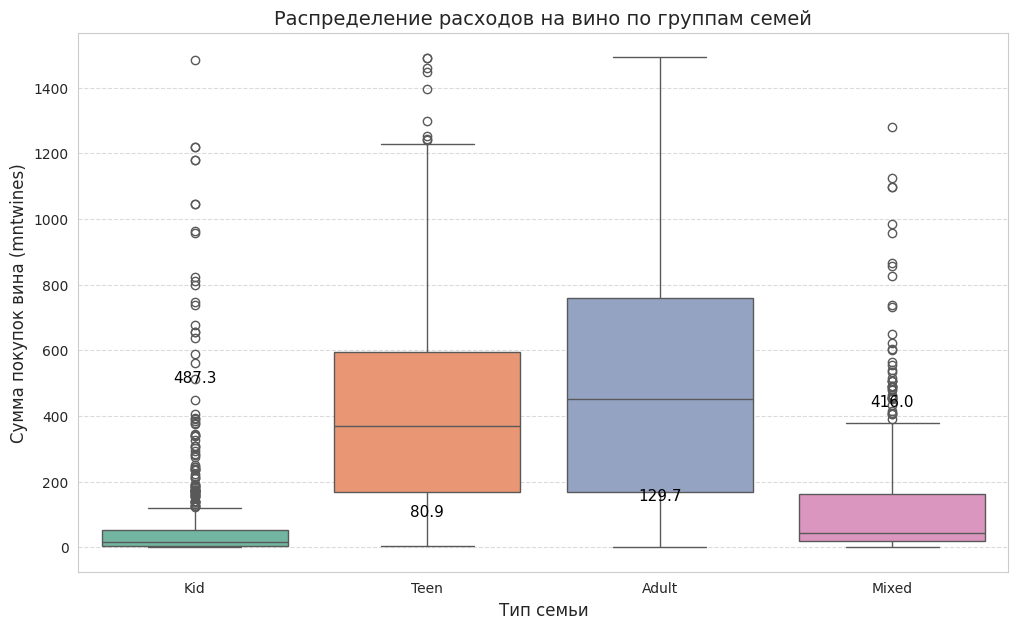


Дополнительная статистика:


Wine                                                           
       count        mean         std  min     25%    50%    75%     max
Group                                                                  
Adult  638.0  487.305643  369.628791  0.0  169.25  451.0  760.0  1493.0
Kid    520.0   80.930769  189.027689  0.0    5.00   16.0   51.0  1486.0
Mixed  427.0  129.660422  195.112979  2.0   18.00   44.0  163.5  1279.0
Teen   655.0  415.978626  311.299029  3.0  168.00  369.0  595.0  1492.0

In [ ]:
# Разделяю семьи на группы
kid = people[(people['kidhome'] >= 1) & (people['teenhome'] == 0)]['id']
teen = people[(people['kidhome'] == 0) & (people['teenhome'] >= 1)]['id']
adult = people[(people['kidhome'] == 0) & (people['teenhome'] == 0)]['id']
mixed = people[(people['kidhome'] >= 1) & (people['teenhome'] >= 1)]['id']

# Данные о покупках вина
kid_wine = products[products['id'].isin(kid)]['mntwines']
teen_wine = products[products['id'].isin(teen)]['mntwines']
adult_wine = products[products['id'].isin(adult)]['mntwines']
mixed_wine = products[products['id'].isin(mixed)]['mntwines']

# Средние значения
print("Средние расходы на вино:")
print(f"Семьи с детьми: {kid_wine.mean():.2f}")
print(f"Семьи с подростками: {teen_wine.mean():.2f}")
print(f"Семьи без детей: {adult_wine.mean():.2f}")
print(f"Смешанные семьи: {mixed_wine.mean():.2f}")

wine_data = pd.concat([
    pd.DataFrame({'Group': 'Kid', 'Wine': kid_wine}),
    pd.DataFrame({'Group': 'Teen', 'Wine': teen_wine}),
    pd.DataFrame({'Group': 'Adult', 'Wine': adult_wine}),
    pd.DataFrame({'Group': 'Mixed', 'Wine': mixed_wine})
])

plt.figure(figsize=(12, 7))
sns.boxplot(x='Group', y='Wine', data=wine_data, palette="Set2")
plt.title("Распределение расходов на вино по группам семей", fontsize=14)
plt.xlabel("Тип семьи", fontsize=12)
plt.ylabel("Сумма покупок вина (mntwines)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

means = wine_data.groupby('Group')['Wine'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean+5, f'{mean:.1f}', ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Дополнительная статистика
print("\nДополнительная статистика:")
display(wine_data.groupby('Group').describe())

## Предобработка данных

Соберём разрозненные таблицы в одну (и порадуемся, что их объём позволяет это сделать). Как мы помним, в данных были пропуски.

In [ ]:
df = pd.merge(pd.merge(people, products, on='id'), purchases, on='id')
df.isna().sum()

,0
id,0
year_birth,0
education,0
marital_status,0
income,24
kidhome,0
teenhome,0
dt_customer,0
recency,0
complain,0


Не все алгоритмы машинного обучения умеют работать с пропусками в данных. Есть несколько стратегий для борьбы с пропусками, самая частая - заполнение пропусков модой, медианой или средним. Если пропусков слишком много, то имеет смысл выбросить соответствующую строку или столбец целиком.

Есть и более продвинутые методы, например kNN (K Nearest Neighbours). Суть данного метода заключается в том, что на основании известных признаков для объекта находятся "соседи", располагающиеся как можно ближе к исходному объекту в пространстве. Затем по этим объектам вычисляется значение недостающего признака.

Возникает два вопроса:

1. Каким образом представить объекты в пространстве?
2. Как считать расстояние между ними?

Ответ на оба — зависит от задачи. Объект обычно проще всего представить как вектор признаков. Для подсчета расстояния используются, например:
- евклидово расстояние и его общий случай (расстояние минковского);
- косинусное расстояние;
- манхэттенское расстояние
- расстояние Чебышёва;
- какое угодно, придуманное вами.

Реализуем kNN для восстановления пропущенных значений `income`. Будем считать евклидово расстояние между векторами. Сначала превратим каждую строку в числовой вектор. Для этого выполним следующие шаги:

* удалим столбец `id`

* проведём one-hot кодирование столбцов `education` и `marital_status`

* проведём нормировку (min-max scaling) столбца `dt_customer`

* проведём нормализацию (z-scaling) полученных векторов, потому что евклидово расстояние чувствительно к размерности признаков

Подумайте, почему именно такие преобразования являются необходимыми.

In [ ]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,complain,...,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,...,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,...,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,...,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,...,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,...,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0,...,43,182,42,118,247,2,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0,...,0,30,0,0,8,7,8,2,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0,...,48,217,32,12,24,1,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0,...,30,214,80,30,61,2,6,5,10,3


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
import numpy as np

# 1. Удаляем столбец 'id', так как он не несет полезной информации
#df = df.drop(columns=['id'])

# 2. One-Hot кодирование столбцов 'education' и 'marital_status'
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' для предотвращения мультиколлинеарности
education_marital_encoded = encoder.fit_transform(df[['education', 'marital_status']])
encoded_df = pd.DataFrame(education_marital_encoded, columns=encoder.get_feature_names_out(['education', 'marital_status']))

# 3. Нормировка столбца 'dt_customer' (разница в днях между текущей датой и датой регистрации)
df['dt_customer'] = (pd.to_datetime('today') - pd.to_datetime(df['dt_customer'])).dt.days
scaler_min_max = MinMaxScaler()
df['dt_customer'] = scaler_min_max.fit_transform(df[['dt_customer']])

# 4. Объединяем данные после one-hot кодирования и преобразования
df = pd.concat([df.drop(columns=['education', 'marital_status']), encoded_df], axis=1)

# 5. Нормализуем все данные (z-нормализация)
scaler_standard = StandardScaler()
df_normalized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

# 6. Применяем KNNImputer для восстановления пропущенных значений в 'income'
# Мы обучаем модель на данных без пропусков
imputer = KNNImputer(n_neighbors=5)
df_normalized['income'] = imputer.fit_transform(df_normalized[['income']])[:, 0]

# Восстановленные значения для 'income' будут уже в нормализованном масштабе
# 7. Если необходимо, можно вернуть 'income' к исходному масштабу
df['income'] = scaler_standard.inverse_transform(df_normalized[['income']])[:, 0]

# Теперь данные готовы для использования


ValueError: time data "21-08-2013" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
"""Предобработка данных"""
#df = df.drop('id', axis=1)
df_encoded = pd.get_dummies(
    df,
    columns=['education', 'marital_status'],  # Столбцы для кодирования
    dtype=int                                 # Тип данных для новых столбцов (0/1)
)

df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')
df['days_since_reg'] = (df['dt_customer'] - df['dt_customer'].min()).dt.days
scaler = MinMaxScaler()
df['days_scaled'] = scaler.fit_transform(df[['days_since_reg']])

numeric_cols = ['year_birth', 'kidhome', 'teenhome',
                   'days_since_reg', 'recency', 'complain']

processed_df = pd.concat([df[numeric_cols], df_encoded], axis=1)

scaler = StandardScaler()
processed_df_scaled = scaler.fit_transform(processed_df)
f = df.drop('id', axis=1)
#Z-нормализация
scaler_z = StandardScaler()
X = scaler_z.fit_transform(df[features])

In [ ]:
encoded_df

,education_Basic,education_Graduation,education_Master,education_PhD,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df

Допишите реализацию kNN.

In [ ]:
import numpy as np
from scipy.spatial import distance

class CustomKNeighborsRegressor:
    def __init__(self, n_neighbors=3):
        # Количество ближайших соседей
        self.n_neighbors = n_neighbors
        self.X_train = None  # Данные для обучения
        self.y_train = None  # Целевая переменная для обучения

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def kneighbors(self, X_test):
        #k ближайших соседей
        distances = []
        indices = []

        for test_point in X_test.values:
            # Расстояния от тестовой точки до всех обучающих точек
            dist = distance.cdist([test_point], self.X_train, 'euclidean')[0]

            # Индексы k ближайших соседей
            nearest_neighbors = np.argsort(dist)[:self.n_neighbors]

            distances.append(dist[nearest_neighbors])
            indices.append(nearest_neighbors)

        return np.array(distances), np.array(indices)



# Данные без пропусков
X_train = df.dropna().drop(columns='income')
y_train = df.dropna()['income']

# Создание и обучение модели
knn = CustomKNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

X = df[df['income'].isna()].drop(columns='income')

distances, indices = knn.kneighbors(X)

print("Индексы ближайших соседей:", indices)
print("Расстояния до ближайших соседей:", distances)


Если вы всё сделали правильно, то результаты должны совпасть с решением "из коробки", порядок возвращаемых соседей можно не учитывать.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(df.dropna().drop(columns='income'), df.dropna())
distances, indices = knn.kneighbors(df[df['income'].isna()].drop(columns='income'))

print("Индексы ближайших соседей:", indices)
print("Расстояния до ближайших соседей:", distances)

Заполните пропуски в `income` средним значением по 3 ближайшим соседям.

In [ ]:
income_predictions = []
for idx in indices:
    # Вычисляем среднее значение 'income' для ближайших соседей
    predicted_income = y_train.iloc[idx].mean()
    income_predictions.append(predicted_income)

df.loc[df['income'].isna(), 'income'] = income_predictions

In [ ]:
df['income'] = StandardScaler().fit_transform(df[['income']])

In [ ]:
df = pd.merge(pd.merge(people, products, on='id'), purchases, on='id')
df.isna().sum()

## Кластеризация. Методы снижения размерности

In [ ]:
%%capture
!pip install umap-learn

Раз уж мы заговорили про поиск похожих между собой объектов, обсудим также кластеризацию.

[Кластеризация](https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7) - это один из видов задач обучения без учителя. Она заключается в разбиении всех объектов на группы похожих между собой объектов и сильно отличающихся от всех остальных. Так как строгого понятия похожести объектов нет, то алгоритмов кластеризации много, а результаты их работы могут сильно зависеть от качества входных данных и подобранных гиперпараметров.

Обсудим один из самых популярных методов кластеризации - [kMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.
Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.
Метод может быть сформулирован как задача оптимизации, а именно, минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров по центроидам и кластерам: $$\sum_{i=1}^k \sum_{X_n \in C_i} ||X_n - \mu_i||^2 \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_i$ - это центр масс кластера $C_i$.}$$
Решение такой задачи оптимизации является NP-трудной задачей, однако существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости.
Предположим, что как-то (например, случайно) выбраны начальные положения центроидов $\mu_1, \dots, \mu_k$.

1. Этап кластеризации. На данном этапе происходит кластеризация выборки, как было описано выше: каждый объект относится к кластеру ближайшего к нему центроида. Формально, $$C_i = \{X_n : ||X_n - \mu_i|| \leq ||X_n - \mu_j||, \text{ для всех $j \in \{1, \dots, k\}$}\}.$$

2. Этап обновления центроидов. На данном этапе центроиды пересчитываются, как центры масс только что построенных кластеров. Формально, $$\mu_i = \frac{1}{|C_i|}\sum_{X_n \in C_i} X_n.$$

Этот процесс продолжается, пока центроиды и кластеризация продолжают изменяться. Алгоритм гарантированно сходится, однако не гарантируется достижение глобального минимума, а только одного из локальных минимумов. Другим недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров. На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются. Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.

_определение взято из материалов курса [ODS](https://habrahabr.ru/company/ods/)_


Посмотрим, что будет давать реализация алгоритма "из коробки" на наших данных. Возьмем только данные из таблицы продуктов.


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
X = StandardScaler().fit_transform(products.drop(columns='id'))

Сначала нужно определиться с количеством кластеров. Для этого можно воспользоваться "методом локтя" - мы рeшаем задачу кластеризации несколько раз с разным количеством кластеров и выбираем то минимальное количество кластеров, после которого существенного улучшения не происходит. Ориентироваться будем на две метрики - kMeans.inertia_ и Silhouette Score.

**kMeans.inertia_** отражает сумму расстояний от каждой точки до центра ее кластера, возведенных в квадрат. Это значение также известно как сумма внутрикластерных квадратов (Within-Cluster Sum of Squares, WCSS). Математически инерция выражается следующим образом:

$ Inertia = \sum_{i=0}^{n}(min_{\mu_j \in C}(||x_i - \mu_j||^2)) $

Где $x_i$ - это i-й элемент выборки, $\mu_j$ - это центроид кластера $C$, а $||x_i - \mu_j||$ обозначает Евклидово расстояние между точкой $x_i$ и центроидом $\mu_j$. Инерция показывает, насколько плотно группируются объекты внутри кластеров: чем меньше значение инерции, тем ближе объекты находятся к центроидам своих кластеров.

**Silhouette Score** (Силуэт) рассчитывается как разница между средним расстоянием до объектов других кластеров (b) и средним расстоянием до объектов в том же кластере (a), деленная на максимальное из этих значений:

$s = \frac{b - a}{max(a, b)}$

Где $a$ - это среднее расстояние от объекта до других объектов в том же кластере, а $b$ - это минимальное среднее расстояние от объекта до объектов в других кластерах. Значение силуэта лежит в диапазоне от -1 до 1, где высокий положительный счет указывает на то, что объект хорошо соответствует своему кластеру и плохо соответствует соседним кластерам. Обычно, чем выше средний силуэт для всех объектов, тем лучше структурированы кластеры.

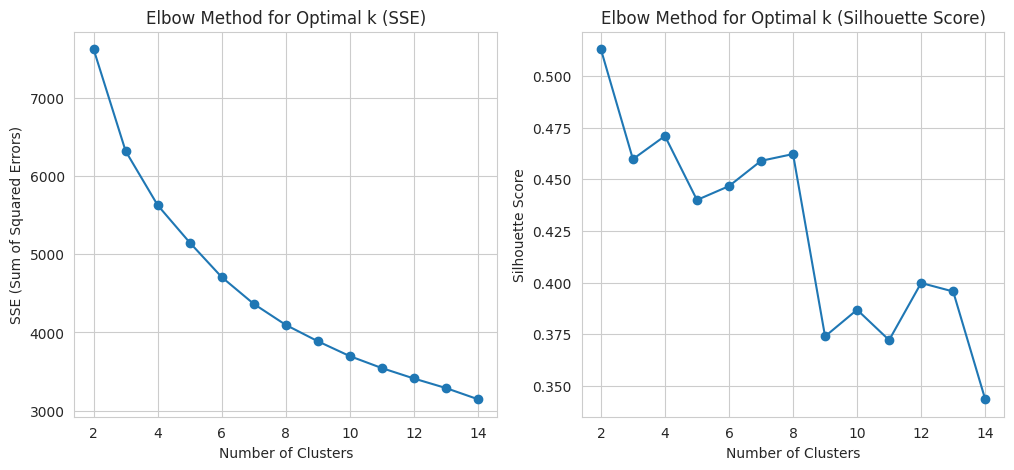

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


xaxs = list(range(2, 15))
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "random_state": 42,
    "algorithm": "lloyd"
}

silhouette_scores = []
sse = []

for k in xaxs:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))

# SSE
plt.subplot(1, 2, 1)
plt.plot(xaxs, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k (SSE)')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(xaxs, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal k (Silhouette Score)')

plt.show()

4 кластера выглядит хорошо. 8 тоже.

In [ ]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(X)
cluster_labels = kmeans.labels_

Посмотрим на то, что получается. 6-мерный вектор будет проблематично отобразить на плоскости, поэтому прибегнем к снижению размерности - переходом в меньшее по количеству измерений признаковое пространство. Рассмотрим три подхода, имеющих реализацию "из коробки" - PCA, t-SNE, UMAP.

**PCA (метод главных компонент)** - это линейный алгоритм, который используется для уменьшения размерности данных путем проекции их на пространство меньшей размерности, сохраняя при этом максимальное количество информации в данных. Это достигается путем определения новых осей (главных компонент), которые направлены в сторону максимальной дисперсии данных. Первая главная компонента имеет наибольшую дисперсию, вторая - максимальную дисперсию среди оставшихся компонент и так далее. Для выбора количества главных компонент часто используют критерий, основанный на объясненной дисперсии, то есть на той доле общей дисперсии, которую объясняют выбранные компоненты.

**t-SNE (Стохастическое вложение соседей с t-распределением)** - это нелинейный алгоритм, который работает на основе вероятностных распределений: в многомерном пространстве данные моделируются так, что похожие объекты имеют высокую вероятность быть "соседями", в то время как непохожие объекты - низкую. Эти вероятности затем используются для определения расположения объектов в пространстве уменьшенной размерности таким образом, чтобы структура данных оставалась похожей. Чем-то напоминает kNN.


**UMAP (Uniform Manifold Approximation and Projection)** - это современный алгоритм уменьшения размерности, который можно считать конкурентом t-SNE. Он также основан на концепции многомерного многообразия, но использует другой математический подход, основанный на топологии. UMAP стремится сохранить глобальную структуру данных, в отличие от t-SNE, который фокусируется больше на локальной.

[Немного красивых картинок](https://habr.com/ru/companies/newprolab/articles/350584/)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


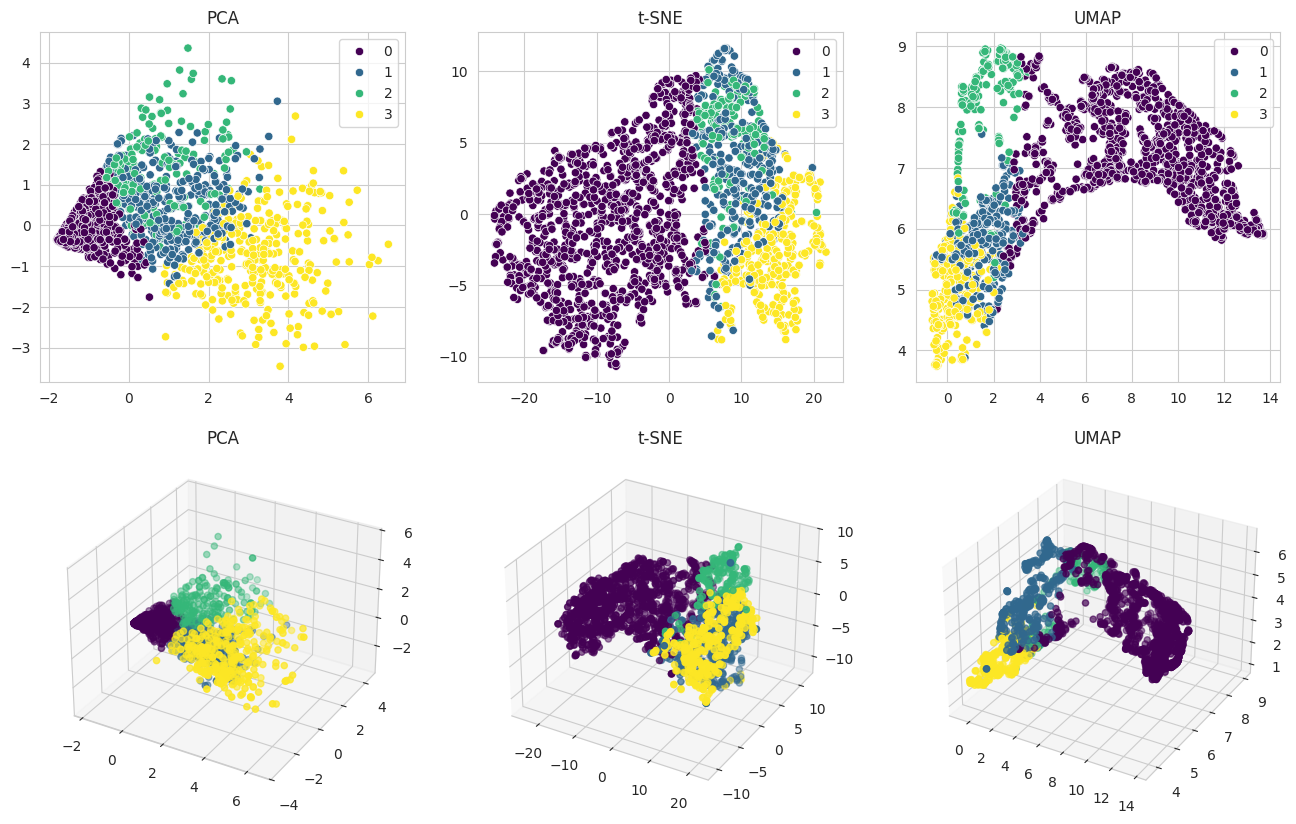

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



pca = PCA(n_components=3)
tsne = TSNE(n_components=3, random_state=42)
umap = UMAP(n_components=3, random_state=42)

pca_result = pca.fit_transform(X)
tsne_result = tsne.fit_transform(X)
umap_result = umap.fit_transform(X)

plt.figure(figsize=(16, 10))

# 2D Plots
plt.subplot(2, 3, 1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('PCA')

plt.subplot(2, 3, 2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('t-SNE')

plt.subplot(2, 3, 3)
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('UMAP')

# 3D Plots
ax1 = plt.subplot(2, 3, 4, projection='3d')
ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels, cmap='viridis')
ax1.set_title('PCA')

ax2 = plt.subplot(2, 3, 5, projection='3d')
ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=cluster_labels, cmap='viridis')
ax2.set_title('t-SNE')

ax3 = plt.subplot(2, 3, 6, projection='3d')
ax3.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c=cluster_labels, cmap='viridis')
ax3.set_title('UMAP')

plt.show()

Попробуйте проинтерпретировать получающиеся результаты.

In [ ]:
products['cluster_labels'] = cluster_labels
products['cluster_labels'].value_counts()

,count
cluster_labels,
0,1297
1,392
3,347
2,204


In [ ]:
cluster_means = products.drop(columns='id').groupby('cluster_labels').mean()
cluster_means.style.background_gradient(cmap='Blues', axis=0)  # можно ли сказать, что у нас есть кластер любителей вина?..

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
cluster_labels,,,,,,
0,96.339244,6.353123,35.407864,8.926754,6.353123,17.320740
1,717.056122,35.826531,366.737245,53.158163,35.084184,39.551020
2,472.176471,25.730392,169.426471,32.328431,25.029412,143.426471
3,514.276657,90.443804,431.469741,129.815562,96.605187,90.435159


### Задание

В предыдущем пункте работы мы применили готовый код для кластеризации, чтобы увидеть, как она работает. Теперь ваша задача - написать код для реализации алгоритма kMeans самостоятельно (речь, конечно, идет о намного менее, нежели версия "из коробки", оптимизированной версии алгоритма).

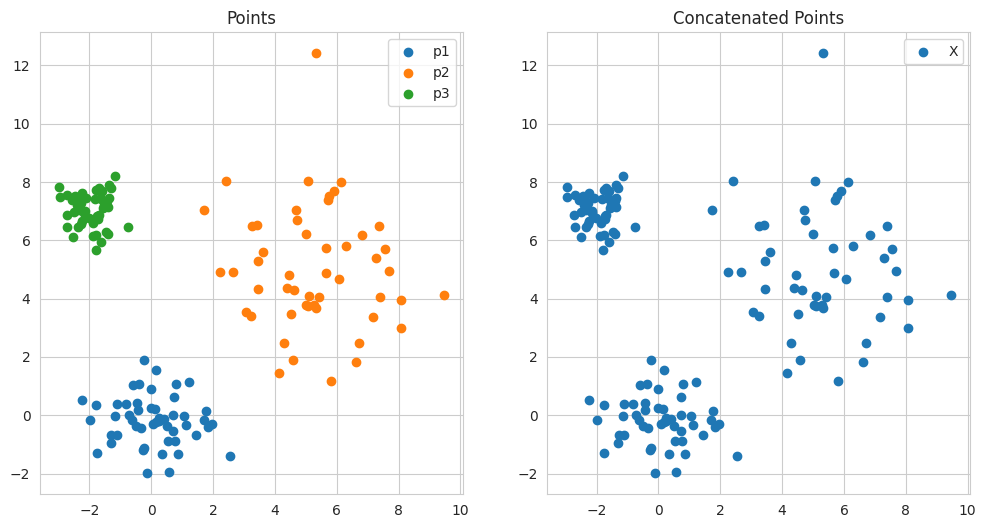

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# игрушечные данные
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=3, scale=0.6, size=(50,2)) - np.array([5, -4])
X = np.concatenate((p1, p2, p3))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(p1[:, 0], p1[:, 1], label='p1')
axs[0].scatter(p2[:, 0], p2[:, 1], label='p2')
axs[0].scatter(p3[:, 0], p3[:, 1], label='p3')
axs[0].set_title('Points')
axs[0].legend()

axs[1].scatter(X[:, 0], X[:, 1], label='X')
axs[1].set_title('Concatenated Points')
axs[1].legend()

plt.show()

### 1
Напишите функцию, которая рассчитывает расстояния от центров кластеров до каждой точки и возвращает, к какому кластеру принадлежит каждая точка.

In [ ]:
import scipy
from scipy.spatial.distance import cdist

def kmeans_predict(X, clusters):
    distances = cdist(X, clusters, 'euclidean')
    labels = np.argmin(distances, axis=1)
    return labels

Посмотрим, что получается.

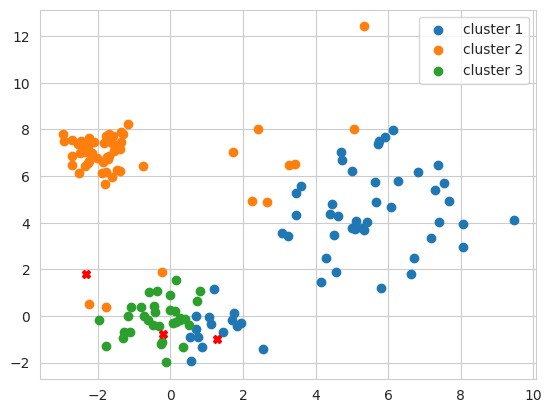

In [ ]:
# случайные координаты для центров кластеров
centroids = np.random.normal(loc=0.0, scale=2., size=6).reshape((3, 2))

labels = kmeans_predict(X, centroids)

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
plt.plot(centroids[:, 0], centroids[:, 1], 'rX')
plt.legend()
plt.show()

### 2
Напишите код для обновления центров кластеров. Запоминайте центры кластеров для дальнейшей визуализации.

In [ ]:
centroids = np.random.normal(loc=0.0, scale=2., size=6).reshape((3, 2))
k = len(centroids)
centroids_history = [centroids]

iters = 7

for i in range(iters):
    labels = kmeans_predict(X, centroids)
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    centroids_history.append(new_centroids)
    centroids = new_centroids

<ipython-input-70-d82b5876916b>:9: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Посмотрим на результат.

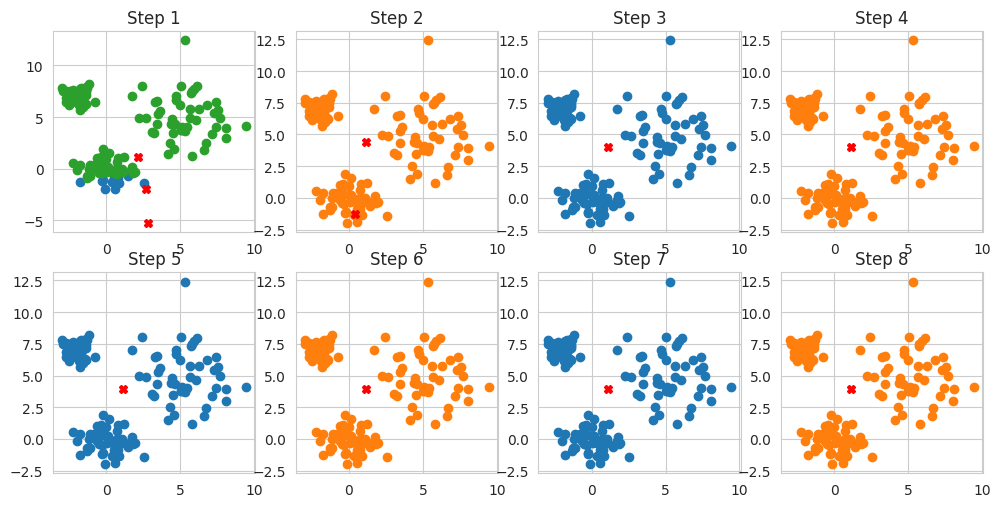

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(iters + 1):
    labels = kmeans_predict(X, centroids_history[i])
    plt.subplot((iters + 1) // 2, (iters + 1) // 2, i + 1)
    plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster 1')
    plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
    plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
    plt.plot(centroids_history[i][:, 0], centroids_history[i][:, 1], 'rX')
    # plt.legend()
    plt.title('Step {:}'.format(i + 1))

### 3

Напишите функцию обучения kMeans. Параметры:

* k - кол-во кластеров,
* max_iter - через сколько итераций нужно остановиться,
* tol - если сумма расстояний между прошлыми центрами кластеров и новыми центрами меньше tol (для всех кластеров!), то остановиться,
* low и high - это минимально и максимально значение, которое могут принимать точки центров кластеров при генерации.



Начните с генерации центров кластеров с помощью np.random.uniform. Затем на каждой итерации нужно сделать следующее:
* определить, к какому кластеру относится каждая точка,
* по точкам в кластере пересчитать центр кластера, если точек в кластере нет - сгенерировать новый случайный центр,
* посчитать loss как сумму расстояний (euclidean) между кластерами, полученными на прошлой итерации, и новыми кластерами.

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

# Инициализация
def kmeans_fit_predict(x, k=8, max_iter=100, tol=0.001, low=0.0, high=1.0, print_progress=False):
    clusters = np.random.uniform(low, high, (k, x.shape[1]))
    loss_history = []
    # Ближайшие центроиды
    for i in range(max_iter):
        distances = cdist(x, clusters, 'euclidean')
        labels = np.argmin(distances, axis=1)

        new_clusters = np.array([x[labels == j].mean(axis=0) for j in range(k)])

        loss = np.sum(np.linalg.norm(new_clusters - clusters, axis=1))
        loss_history.append(loss)
        # Критерий остановки
        if loss < tol:
            if print_progress:
                print(f"Номер последней итерации {i + 1}.")
            break

        clusters = new_clusters

        if print_progress:
            print(f"Итерация {i + 1}, Loss: {loss:.4f}")

    return clusters, labels, loss_history

Проверим работу функции.

In [ ]:
clusters, labels, loss_history = kmeans_fit_predict(X, k=3, low=0.0, high=np.max(X), print_progress=True)

Итерация 1, Loss: 9.5039
Итерация 2, Loss: 3.1185
Итерация 3, Loss: 1.1405
Итерация 4, Loss: 0.2864
Итерация 5, Loss: 0.1305
Номер последней итерации 6.


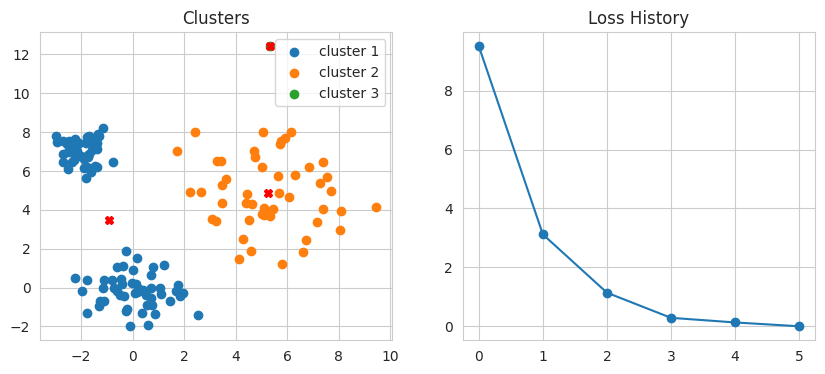

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
plt.plot(clusters[:, 0], clusters[:, 1], 'rX')
plt.title('Clusters')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_history, marker='o')
plt.title('Loss History')

plt.show()